In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_training(path):
    df = pd.read_csv(path)

    # Identify epochs where val_loss is a new minimum so far
    running_min = df["val_loss"].expanding().min()
    improvement_mask = df["val_loss"] == running_min

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot loss curves
    l1, = ax1.plot(df["epoch"], df["train_loss"], label="Train Loss", color="tab:blue")
    l2, = ax1.plot(df["epoch"], df["val_loss"], label="Validation Loss", color="tab:orange")

    # Highlight every new best validation loss
    ax1.scatter(df.loc[improvement_mask, "epoch"], 
                df.loc[improvement_mask, "val_loss"], 
                color="red", marker="*", s=120, edgecolor="black", 
                label="New Best Val Loss")

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Validation accuracy on secondary axis
    ax2 = ax1.twinx()
    l3, = ax2.plot(df["epoch"], df["val_acc"], color="tab:green", linestyle='--', label="Validation Accuracy")
    ax2.set_ylabel("Validation Accuracy")

    # Combine legends from both axes
    lines = [l1, l2, l3]
    labels = [line.get_label() for line in lines]
    # Add the new-best markers to the legend
    lines.append(ax1.scatter([], [], color="red", marker="*", s=100, edgecolor="black"))
    labels.append("New Best Val Loss")

    ax1.legend(lines, labels, loc="upper center", bbox_to_anchor=(0.5, 1.18), ncol=4, frameon=True)

    plt.title("Training/Validation Loss and Validation Accuracy")
    plt.tight_layout()
    plt.show()

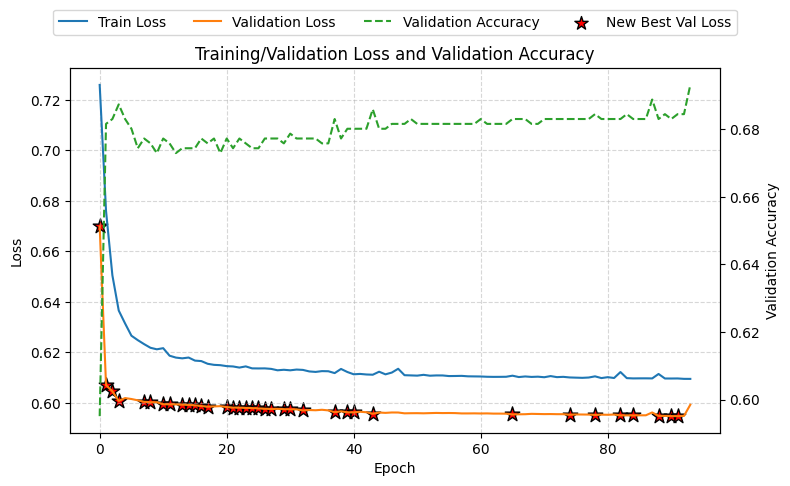

In [27]:
path_to_csv = "training_log_4103ede6-adb5-11f0-a5cb-fb4fc218edf0.csv"
plot_training(path_to_csv)